Introducting data augmentation to reducing overfitting
And thus applying
* rotation
* flipping
* zooming
* cropping

In [44]:
import tensorflow as tf
import numpy as np
import os

In [45]:
train_num = len(os.listdir('pizza_steak/train/pizza'))
test_num = len(os.listdir('pizza_steak/test/pizza'))

train_num, test_num

(750, 250)

In [46]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_image(image_dir, class_name):
    target_dir = image_dir + class_name

    random_image = random.sample(os.listdir(target_dir),1)
    print (random_image)

    img = mpimg.imread(target_dir + '/' + random_image[0])
    plt.figure(figsize=(6,6))
    plt.axis('off')
    plt.title(class_name)
    plt.imshow(img)

    return img




['290850.jpg']


array([[[152, 123, 107],
        [ 88,  59,  41],
        [ 71,  45,  22],
        ...,
        [216, 193, 159],
        [223, 200, 166],
        [221, 198, 164]],

       [[161, 132, 116],
        [101,  72,  54],
        [ 54,  28,   5],
        ...,
        [225, 202, 168],
        [228, 205, 171],
        [224, 201, 167]],

       [[131, 102,  88],
        [106,  77,  61],
        [ 80,  53,  32],
        ...,
        [227, 204, 170],
        [225, 202, 170],
        [218, 195, 163]],

       ...,

       [[225, 209, 194],
        [226, 210, 195],
        [228, 212, 199],
        ...,
        [229, 207, 194],
        [227, 205, 192],
        [223, 201, 188]],

       [[224, 208, 192],
        [224, 208, 192],
        [226, 210, 195],
        ...,
        [226, 204, 191],
        [223, 201, 190],
        [218, 196, 185]],

       [[224, 208, 192],
        [224, 208, 192],
        [226, 210, 195],
        ...,
        [226, 204, 191],
        [224, 202, 191],
        [220, 198, 187]]

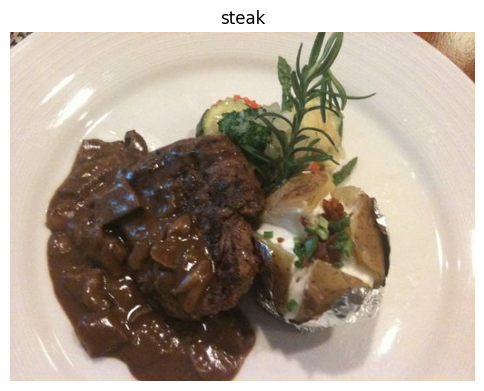

In [47]:
view_image('pizza_steak/train/', 'steak')

Defining the data augmentation parameters

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_aug = ImageDataGenerator(rescale=1./225,
                                    zoom_range=0.2,
                                    rotation_range=0.2,
                                    shear_range=0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True,
                                    )

train_data_gen = ImageDataGenerator(rescale=1./225)
test_data_gen = ImageDataGenerator(rescale=1./225)

In [49]:
train_path = 'pizza_steak/train'
test_path ='pizza_steak/test'

print('Augmented training data:')
train_img_aug = train_data_aug.flow_from_directory(
                                                   train_path,
                                                   batch_size=32,
                                                   target_size=(224,224),
                                                   class_mode='binary',
                                                   shuffle = False
                                                
)

print('Non Augmented training data:')
train_img = train_data_gen.flow_from_directory(
                                               train_path,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               shuffle = False

)

print('Non Augmented test data:')
test_img = test_data_gen.flow_from_directory(
                                             test_path,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode= 'binary'
)

Augmented training data:
Found 1500 images belonging to 2 classes.
Non Augmented training data:
Found 1500 images belonging to 2 classes.
Non Augmented test data:
Found 500 images belonging to 2 classes.


In [50]:
train_images, labels = next(train_img)
aug_train_images, aug_labels = next(train_img_aug)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


7


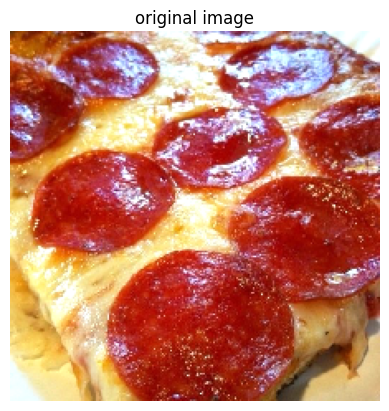

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


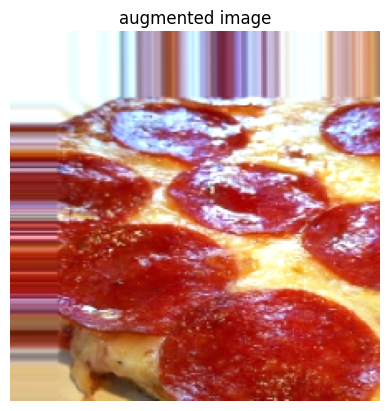

In [51]:
random_num = random.randint(0,32)

random_img = train_images[random_num]
random_aug_img = aug_train_images[random_num]

print(random_num)
plt.imshow(random_img)
plt.title('original image')
plt.axis('off')
plt.show()
plt.figure()
plt.imshow(random_aug_img)
plt.title('augmented image')
plt.axis('off')
plt.show()

In [52]:
# defining the model parameters
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(10, 3, input_shape=(224,224,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2))

model.add(tf.keras.layers.Conv2D(10, 3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2))

model.add(tf.keras.layers.Conv2D(10, 3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compiling the model
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)
# fit the model
history = model.fit(
    train_img_aug,
    epochs = 10,
    validation_data = test_img
)

Epoch 1/10


c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 33s 589ms/step - accuracy: 0.4530 - loss: 0.7074 - val_accuracy: 0.6200 - val_loss: 0.6743
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 33s 646ms/step - accuracy: 0.5571 - loss: 0.6850 - val_accuracy: 0.5580 - val_loss: 0.6688
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 699ms/step - accuracy: 0.6021 - loss: 0.6681 - val_accuracy: 0.5180 - val_loss: 0.6681
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 31s 571ms/step - accuracy: 0.4638 - loss: 0.7521 - val_accuracy: 0.7120 - val_loss: 0.5948
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 588ms/step - accuracy: 0.6708 - loss: 0.6720 - val_accuracy: 0.5000 - val_loss: 1.0211
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 30s 546ms/step - accuracy: 0.5158 - loss: 0.7624 - val_accuracy: 0.7600 - val_loss: 0.6181
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 27s 507ms/step - accuracy: 0.6596 - loss: 0.6363 - val_accuracy: 0.8160 - val_loss: 0.5564
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 27s 510ms/step - accuracy: 0.7098 - loss: 0.6107 - val_accuracy: 0.760

In [53]:
def loss_function(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epoch = range(10)

    plt.figure()
    plt.plot(epoch, val_loss, label='loss')
    plt.plot(epoch, loss, label='val-loss')
    plt.title('loss-curve')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(epoch, val_accuracy, label='accuracy')
    plt.plot(epoch, accuracy, label='accuracy')
    plt.title('Accuracy')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()

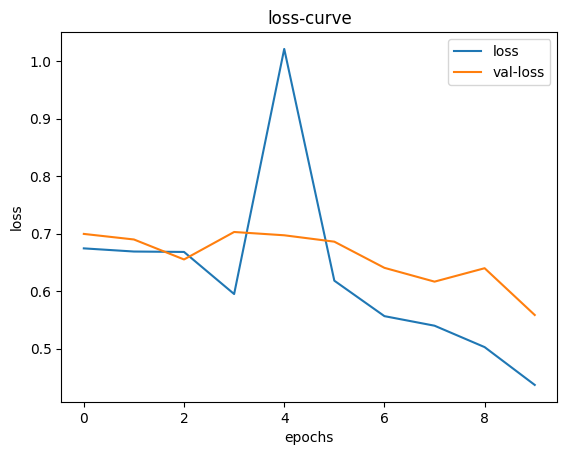

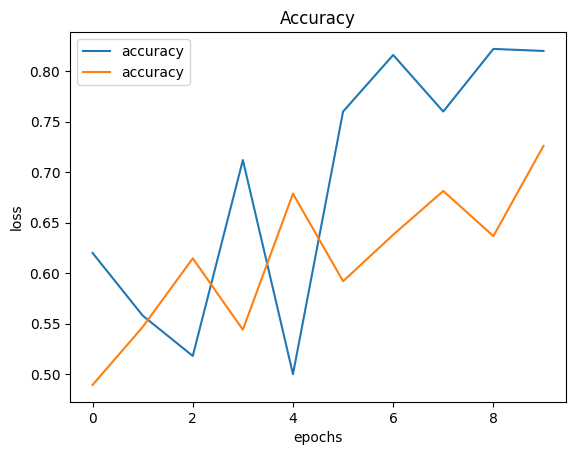

In [54]:
loss_function(history)

Now let's see if we turn shuffle on, the accuarcy of the the model improve??

In [55]:
shuffled_train_data_aug = train_data_aug.flow_from_directory(train_path,
                                         target_size=(224,224),
                                         class_mode='binary',
                                         batch_size=32,
                                         shuffle=True)

Found 1500 images belonging to 2 classes.


In [58]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Conv2D(10,3,input_shape=(224,224,3), activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(2))
model2.add(tf.keras.layers.Conv2D(10,3,activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(2))
model2.add(tf.keras.layers.Conv2D(10,3,activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(2))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

history2 = model2.fit(shuffled_train_data_aug,
                    epochs=10,
                    validation_data = test_img)

c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 553ms/step - accuracy: 0.5911 - loss: 0.6651 - val_accuracy: 0.7400 - val_loss: 0.5225
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 27s 514ms/step - accuracy: 0.7123 - loss: 0.5741 - val_accuracy: 0.8100 - val_loss: 0.4400
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 27s 513ms/step - accuracy: 0.7414 - loss: 0.5477 - val_accuracy: 0.8040 - val_loss: 0.4450
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 27s 513ms/step - accuracy: 0.7778 - loss: 0.4882 - val_accuracy: 0.8160 - val_loss: 0.4116
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 547ms/step - accuracy: 0.7457 - loss: 0.5045 - val_accuracy: 0.8280 - val_loss: 0.4010
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 28s 520ms/step - accuracy: 0.7796 - loss: 0.4813 - val_accuracy: 0.8440 - val_loss: 0.3836
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 28s 538ms/step - accuracy: 0.7365 - loss: 0.5238 - val_accuracy: 0.8580 - val_loss: 0.3463
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 537ms/step - accuracy: 0.7700 - loss: 0.5013 - val_accuracy: 0.852

Notes: Shuffling your data can improve your performance of the model.

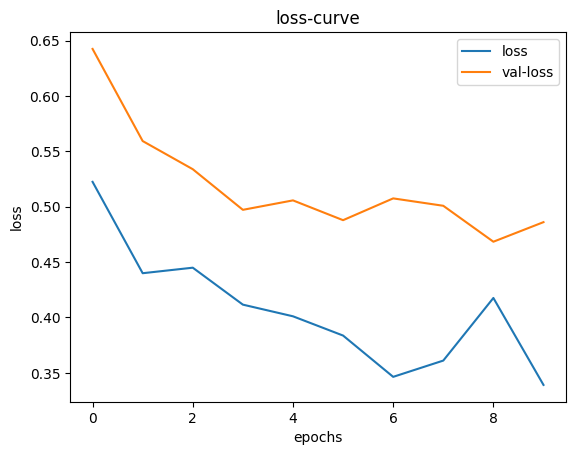

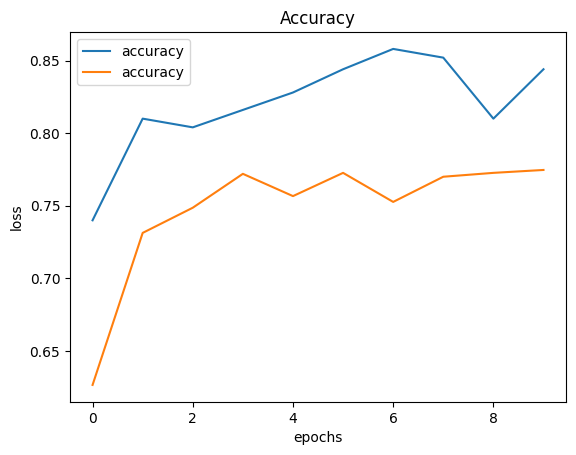

In [60]:
loss_function(history2)

In [63]:
import pathlib
import glob

dir_names = pathlib.Path('pizza_steak/train')
class_namess = np.array(sorted(item.name for item in dir_names.glob('*')))
print(class_namess)

['pizza' 'steak']


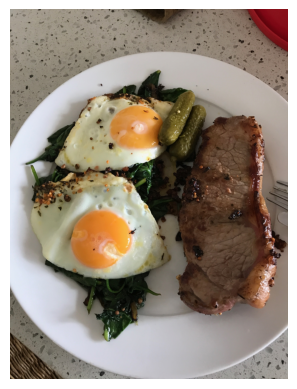

In [ ]:
import matplotlib.image as mpimg


steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis('off')
plt.show()


In [77]:
steak.shape

(4032, 3024, 3)

In [78]:
image_size = 224

def load_image(filename, image_size):
    # load the image
    image = tf.io.read_file(filename)
    # convert image to tensors
    image = tf.image.decode_image(image)
    # resize image
    image = tf.image.resize(image, [image_size, image_size])
    # rescale image
    image = image/225.0
    return image


In [87]:
steak = load_image('03-steak.jpeg', image_size)

In [88]:
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.7227778 , 0.705     , 0.6561111 ],
        [0.7372222 , 0.7161111 , 0.66833335],
        [0.7161111 , 0.6894444 , 0.63611114],
        ...,
        [0.5911111 , 0.05777778, 0.10222222],
        [0.5611111 , 0.04777778, 0.08      ],
        [0.5988889 , 0.08777778, 0.11888889]],

       [[0.75      , 0.7322222 , 0.69222224],
        [0.7238889 , 0.70611113, 0.6527778 ],
        [0.74333334, 0.71666664, 0.66333336],
        ...,
        [0.6066667 , 0.07777778, 0.10444444],
        [0.60055554, 0.06722222, 0.10722222],
        [0.5827778 , 0.06277778, 0.09833334]],

       [[0.73888886, 0.7211111 , 0.6677778 ],
        [0.72444445, 0.69555557, 0.6433333 ],
        [0.7438889 , 0.71055555, 0.66055554],
        ...,
        [0.6022222 , 0.07333333, 0.09111111],
        [0.5977778 , 0.07777778, 0.11333334],
        [0.5922222 , 0.05888889, 0.09888889]],

       ...,

       [[0.5588889 , 0.48444444, 0.35166666],
        [0.06

In [100]:
model2.predict(tf.expand_dims(steak, axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.78184456]], dtype=float32)

In [ ]:
def pred_and_view(model, filename, class_name=class_namess):
    img = load_image(filename, image_size=image_size)

    pred = model.predict(tf.expand_dims(img, axis=0))

    prediction = int(tf.round(pred))

    img = class_name[prediction]

    plt.imshow(img)
    plt.title(f'Predicted class: {img}')
    
    plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


TypeError: Image data of dtype <U5 cannot be converted to float

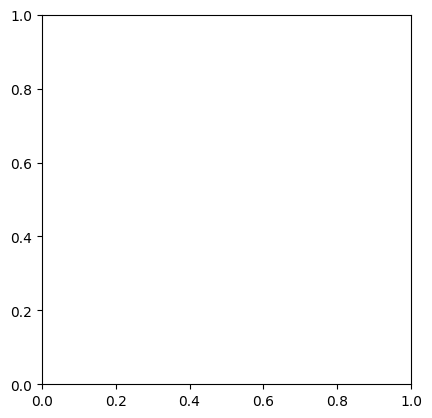

In [115]:
pred_and_view(model2, '03-steak.jpeg')